In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('\\').join(pth.split('\\')[:-1])+"\\Utils")
from Utilities import *
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage import morphology
from skimage.transform import rotate
import json
import cv2
from scipy import stats

In [33]:
name='c1anemia-129'
#di=('\\').join(pth.split('\\')[:-3])+'\\Data_base\\Imagenes_originales\\'+name+'.jpg'
#ROI=('\\').join(pth.split('\\')[:-3])+'\\Data_base\\Sem_Auto\\eye_'+name+'.jpg'
di = "C:\\UNI\\Labo\\Liiarpi_1-master\\c1anemia-129.jpg"
ROI = "C:\\UNI\\Labo\\Liiarpi_1-master\\Sem_Auto1\\eye_c1anemia-129_13.0.jpg"
img = io.imread(di)
ROI = io.imread(ROI)

f1=open("C:\\UNI\\Labo\\Liiarpi_1-master\\validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)

xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

mr=xywh[np.where(imgnames==(name+".jpg"))][0]
print(mr)
mask=assemble_mask(mr,img,ROI)
mask1 = np.sum(mask, axis = 2)
mask1 = mask1>1
m_slic = slic(image = img, n_segments = 20, sigma = 5, slic_zero = True, mask = mask1)

[2339  617 1152  808]


969 1401
2355 3491


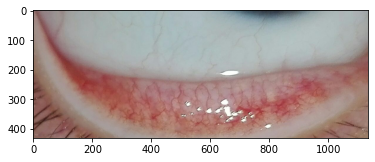

In [34]:
rww = np.max(mask1, axis = 1)
cww = np.max(mask1, axis = 0)
rl = np.argmax(rww)
rh = img.shape[0]-np.argmax(rww[::-1])
cl = np.argmax(cww)
ch = img.shape[1]-np.argmax(cww[::-1])
print(rl, rh)
print(cl, ch)
img1 = img[rl:rh, cl:ch, :]
m_slic1 = m_slic[rl:rh, cl:ch]
plt.imshow(img1)


In [48]:
def mo(a):
    hist, bins = np.histogram(a, bins = 50, range = (0., 255.0))
    i = np.argmax(hist)
    return (bins[i]+bins[i+1])/2
    
N = np.unique(m_slic.flatten())
img2 = img1.reshape(-1, 3)
m_slic2 = m_slic1.flatten()
img2.shape, m_slic2.shape
for i in range(1, len(N)):
    print(f"--------Segmento {i}--------")    
    #plt.figure()
    al = img2[m_slic2==i]
    ale = al[(al<250).all(axis = 1)]
    print(ale.shape)
    ele = al[(np.abs(stats.zscore(al)) > 2.5).all(axis=1)]
    print(f"Porcentaje de blancos: {(100-(ale.shape[0]*100/al.shape[0])):.2f}%")
    print("Media antes y despues")
    print(np.mean(al, axis = 0), np.mean(ale, axis = 0))
    print("Std antes y despues")
    print(np.std(al, axis = 0), np.std(ale, axis = 0))
    print("Moda antes y despues")
    print((mo(al[:0]),mo(al[:1]), mo(al[:2])), (mo(ale[:0]),mo(ale[:1]), mo(ale[:2])))
    print(f"Outliers al 2.5 {(ele.shape[0]/al.shape[0]):.1f}")
    el = m_slic1==i
    el = el.astype(np.uint8)
    print("========================================================")
    #plt.imshow(cv2.bitwise_and(img1, img1, mask = el))
    #plt.show()
    

--------Segmento 1--------
(5196, 3)
Porcentaje de blancos: 0.00%
Media antes y despues


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [15]:
name='c1anemia-55'
#di=('\\').join(pth.split('\\')[:-3])+'\\Data_base\\Imagenes_originales\\'+name+'.jpg'
#ROI=('\\').join(pth.split('\\')[:-3])+'\\Data_base\\Sem_Auto\\eye_'+name+'.jpg'
di = "C:\\UNI\\Labo\\Liiarpi_1-master\\c1anemia-55.jpg"
ROI = "C:\\UNI\\Labo\\Liiarpi_1-master\\Sem_Auto1\\eye_c1anemia-55_11.5.jpg"
img = io.imread(di)
ROI = io.imread(ROI)

f1=open("C:\\UNI\\Labo\\Liiarpi_1-master\\validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)

xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

mr=xywh[np.where(imgnames==(name+".jpg"))][0]
print(mr)
mask=assemble_mask(mr,img,ROI)
mask1 = np.sum(mask, axis = 2)
mask1 = mask1>1
m_slic = slic(image = img, n_segments = 20, sigma = 5, slic_zero = True, mask = mask1)

[ 712 1427  894  906]


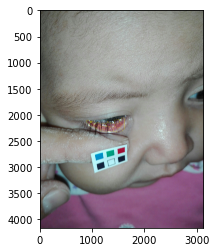

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, m_slic))

In [17]:
img1 = img[2000:2400, 800:1900, :]
m_slic1 = m_slic[2000:2400, 800:1900]

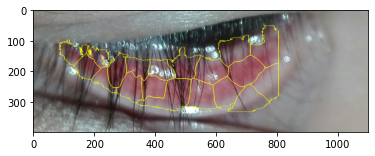

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img1, m_slic1))

In [19]:
def mo(a):
    hist, bins = np.histogram(a, bins = 50, range = (0., 255.0))
    i = np.argmax(hist)
    return (bins[i]+bins[i+1])/2
    
N = np.unique(m_slic.flatten())
img2 = img1.reshape(-1, 3)
m_slic2 = m_slic1.flatten()
img2.shape, m_slic2.shape
for i in range(1, len(N)):
    print(f"--------Segmento {i}--------")    
    #plt.figure()
    al = img2[m_slic2==i]
    ale = al[(al<250).all(axis = 1)]
    print(ale.shape)
    ele = al[(np.abs(stats.zscore(al)) > 2.5).all(axis=1)]
    print(f"Porcentaje de blancos: {(100-(ale.shape[0]*100/al.shape[0])):.2f}%")
    print("Media antes y despues")
    print(np.mean(al, axis = 0), np.mean(ale, axis = 0))
    print("Std antes y despues")
    print(np.std(al, axis = 0), np.std(ale, axis = 0))
    print("Moda antes y despues")
    print((mo(al[:0]),mo(al[:1]), mo(al[:2])), (mo(ale[:0]),mo(ale[:1]), mo(ale[:2])))
    print(f"Outliers al 2.5 {(ele.shape[0]/al.shape[0]):.1f}")
    el = m_slic1==i
    el = el.astype(np.uint8)
    print("========================================================")
    #plt.imshow(cv2.bitwise_and(img1, img1, mask = el))
    #plt.show()

--------Segmento 1--------
(8212, 3)
Porcentaje de blancos: 0.00%
Media antes y despues
[134.71906965  97.67279591 106.05150999] [134.71906965  97.67279591 106.05150999]
Std antes y despues
[23.36321065 19.26145449 19.1294944 ] [23.36321065 19.26145449 19.1294944 ]
Moda antes y despues
(2.55, 68.85, 68.85) (2.55, 68.85, 68.85)
Outliers al 2.5 0.0
--------Segmento 2--------
(7480, 3)
Porcentaje de blancos: 0.00%
Media antes y despues
[100.17914439  77.14157754  83.1065508 ] [100.17914439  77.14157754  83.1065508 ]
Std antes y despues
[36.44370787 31.20870977 33.96639594] [36.44370787 31.20870977 33.96639594]
Moda antes y despues
(2.55, 48.45, 48.45) (2.55, 48.45, 48.45)
Outliers al 2.5 0.0
--------Segmento 3--------
(4286, 3)
Porcentaje de blancos: 0.00%
Media antes y despues
[101.32127858  79.37750817  82.79701353] [101.32127858  79.37750817  82.79701353]
Std antes y despues
[23.76018876 25.73807002 25.20740565] [23.76018876 25.73807002 25.20740565]
Moda antes y despues
(2.55, 119.85, 